In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib import pyplot
from pylab import rcParams
import pickle as pk
import gc

In [2]:
with open('data/bottom_pressure.pd', 'rb') as f:
    botpt_data = pk.load(f)

time = list(botpt_data.index.values)
pressure = list(botpt_data['bottom_pressure'].values)

time_int = []
time = list(pd.to_datetime(botpt_data.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

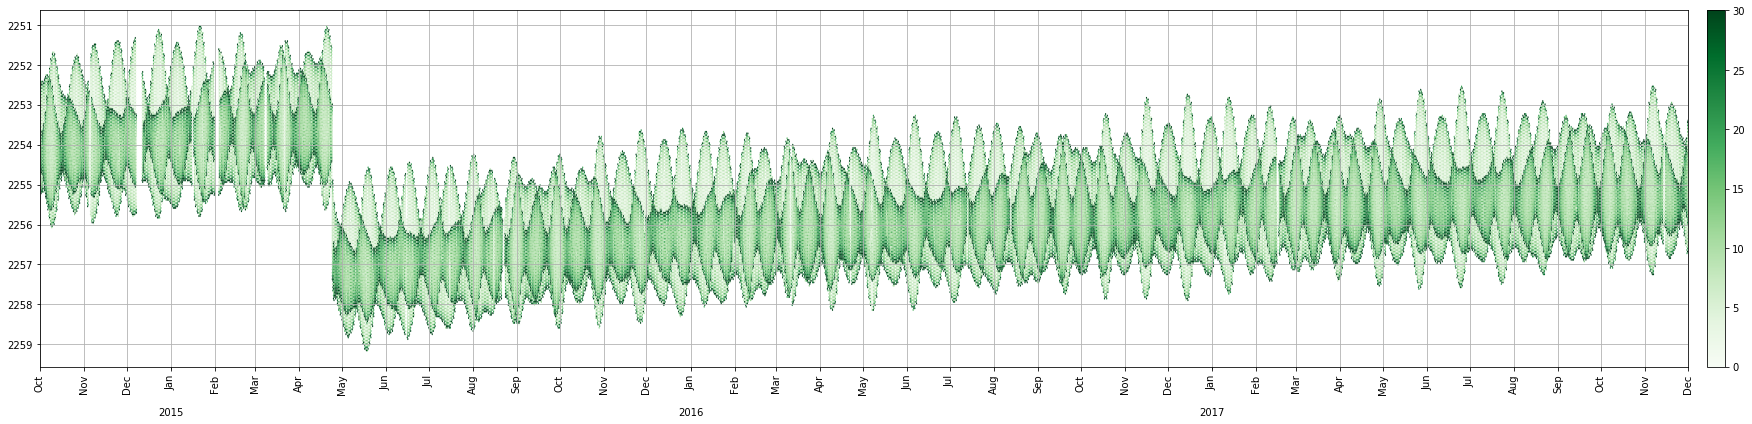

In [3]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(28, 6)
hb1 = ax.hexbin(time_int, pressure, vmin=0, vmax=30, gridsize=(1500,100), mincnt=1, cmap='Greens', linewidths=0)
fig.colorbar(hb1, pad = 0.01)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(datetime.datetime(2014, 10, 1, 0, 0),datetime.datetime(2017, 12, 1, 0, 0))
years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)
plt.tight_layout()
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.gca().invert_yaxis()
plt.show()